### Import Libraries and Dependencies

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Collection and Preprocessing

In [41]:
# Load the data from the csv file to pandas DataFrame
df = pd.read_csv("Titanic-Dataset.csv")

In [42]:
# Printing the first 5 rows of the dataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
# Check the number of rows and columns
df.shape

(891, 12)

In [44]:
# Getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
# Check the number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handle the missing values

In [46]:
# Drop the "Cabin" column from the DataFrame
df = df.drop(columns="Cabin", axis=1)

In [47]:
# Replace the missing values in the "Age" column with the mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [48]:
# Replace the missing values in "Embarked" column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [49]:
# Check if there are still missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis

In [50]:
# Getting some statistical measures about the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization

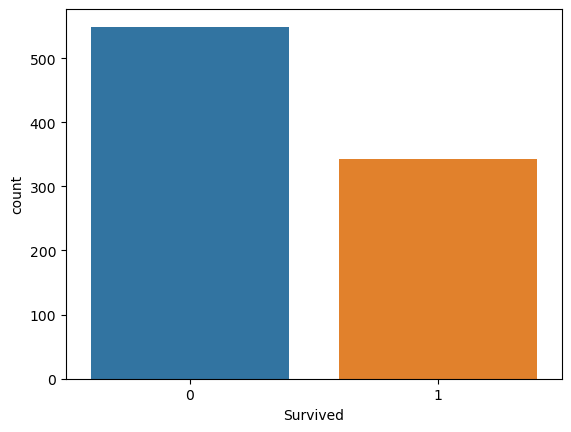

In [51]:
# Count plot for "Survived" column
sns.countplot(x='Survived', data=df)
plt.show()

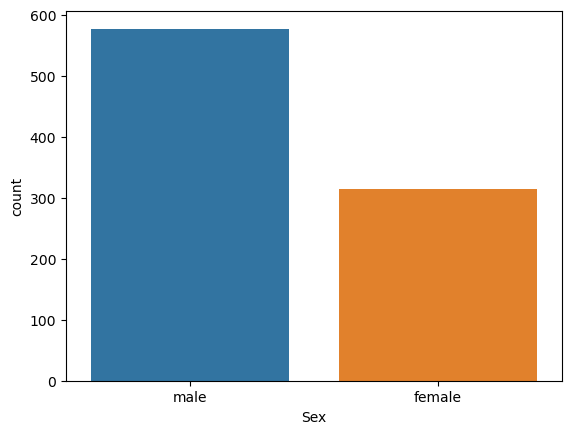

In [52]:
# Count plot for "Sex" column
sns.countplot(x='Sex', data=df)
plt.show()

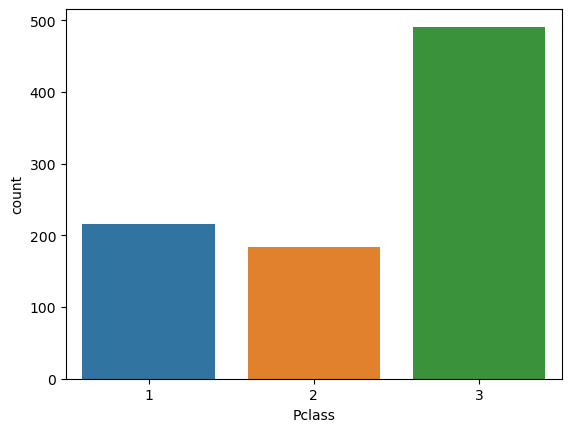

In [53]:
# Count plot for "Pclass" column
sns.countplot(x='Pclass', data=df)
plt.show()

/home/arul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


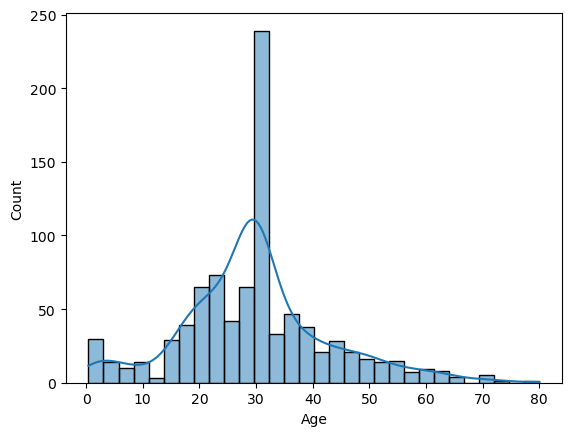

In [54]:
# Histogram for "Age" column
sns.histplot(df['Age'], kde=True)
plt.show()

/home/arul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


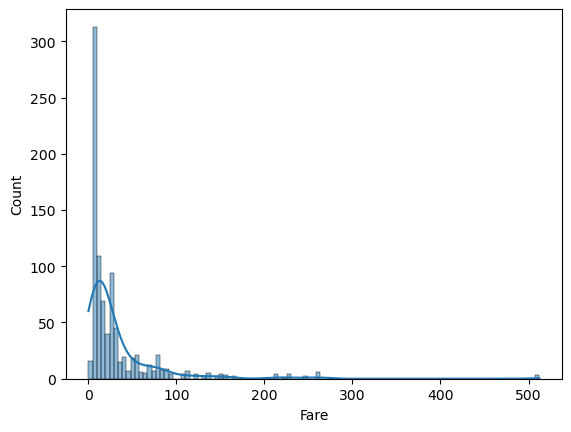

In [55]:
# Histogram for "Fare" column
sns.histplot(df['Fare'], kde=True)
plt.show()

## Encoding the Categorical Columns

In [56]:
# Convert "Sex" and "Embarked" columns to numerical values
df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [57]:
# Separating features and target variable
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = df['Survived']

In [58]:
# Splitting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## Model Training

In [59]:
# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

## Model Evaluation

In [60]:
# Accuracy Score
X_train_prediction = lr.predict(X_train)
X_test_prediction = lr.predict(X_test)

In [61]:
# Training data accuracy
train_accuracy = accuracy_score(Y_train, X_train_prediction)
print(f"Training Data Accuracy: {train_accuracy}")

Training Data Accuracy: 0.8089887640449438


In [62]:
# Test data accuracy
test_accuracy = accuracy_score(Y_test, X_test_prediction)
print(f"Test Data Accuracy: {test_accuracy}")

Test Data Accuracy: 0.7821229050279329


In [63]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, X_test_prediction))

Confusion Matrix:
[[91  9]
 [30 49]]


In [64]:
# Classification Report
print("Classification Report:")
print(classification_report(Y_test, X_test_prediction))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [65]:
# Random Forest Classifier 
rf = RandomForestClassifier(n_estimators=100, random_state=2)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [66]:
# Model Evaluation for Random Forest
X_train_rf_prediction = rf.predict(X_train)
X_test_rf_prediction = rf.predict(X_test)

In [67]:
# Training data accuracy for Random Forest
train_accuracy_rf = accuracy_score(Y_train, X_train_rf_prediction)
print(f"Random Forest - Training Data Accuracy: {train_accuracy_rf}")

Random Forest - Training Data Accuracy: 0.9859550561797753


In [68]:
# Test data accuracy for Random Forest
test_accuracy_rf = accuracy_score(Y_test, X_test_rf_prediction)
print(f"Random Forest - Test Data Accuracy: {test_accuracy_rf}")

Random Forest - Test Data Accuracy: 0.7932960893854749


In [69]:
# Confusion Matrix for Random Forest
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(Y_test, X_test_rf_prediction))

Random Forest - Confusion Matrix:
[[86 14]
 [23 56]]


In [70]:
# Classification Report for Random Forest
print("Random Forest - Classification Report:")
print(classification_report(Y_test, X_test_rf_prediction))

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.80      0.71      0.75        79

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

